<a href="https://colab.research.google.com/github/th-shristi/Books/blob/main/Python%20for%20Data%20Analysis/PFDA_ch02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import json

In [52]:
path = "/content/ch02_data.txt"

In [53]:
records = [json.loads(line) for line in open(path)]

In [54]:
records[0]['tz']

'America/New_York'

In [55]:
print(records[0]['tz'])

America/New_York


In [56]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [57]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [58]:
def get_counts(sequence):
  count = {}

  for x in sequence:
    if x in count:
      count += x
    else:
      count[x] = 1
  return count

In [59]:
from collections import defaultdict

In [60]:
def get_counts(sequence):
  count = defaultdict(int)

  for x in sequence:
    count[x] += 1
  return count

In [61]:
count_tz = get_counts(time_zones)
count_tz['America/New_York']

1251

In [62]:
len(time_zones)

3440

In [63]:
def top_count(count_dict, n=10):
  value_kp = [(count,tz) for tz,count in count_dict.items()]
  value_kp.sort()
  return value_kp[-n:]

In [64]:
top = top_count(count_tz)
top

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [65]:
from collections import Counter

In [66]:
count = Counter(time_zones)

In [67]:
count.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [68]:
from pandas import DataFrame, Series
import pandas as pd

In [69]:
df = DataFrame(records)
df.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [70]:
df['tz'][:10]

,tz
0,America/New_York
1,America/Denver
2,America/New_York
3,America/Sao_Paulo
4,America/New_York
5,America/New_York
6,Europe/Warsaw
7,
8,
9,


In [71]:
c = df['tz'].value_counts()
c

,count
tz,
America/New_York,1251
,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191
...,...
America/Argentina/Cordoba,1
Europe/Volgograd,1
America/La_Paz,1


In [72]:
clean_tz = df['tz'].fillna('Missing')

In [73]:
clean_tz[clean_tz == ''] = 'Unknown'

In [74]:
tz_counts = clean_tz.value_counts()
tz_counts[:10]

,count
tz,
America/New_York,1251
Unknown,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191
Missing,120
Europe/London,74
Asia/Tokyo,37
Pacific/Honolulu,36


<Axes: ylabel='tz'>

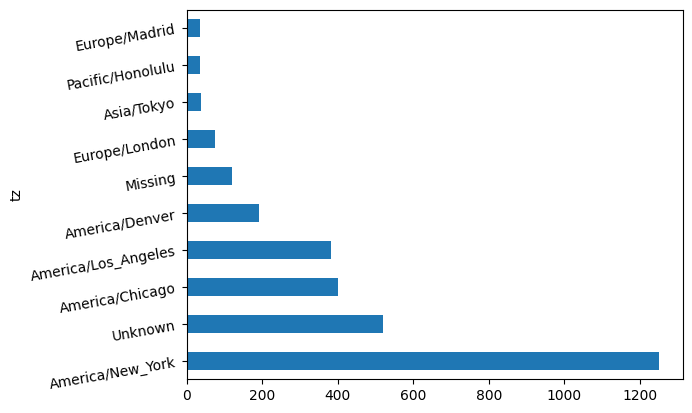

In [75]:
tz_counts[:10].plot(kind='barh', rot=10)